In [21]:
from PIL import Image
import numpy as np
import csv
import matplotlib.pyplot as plt
import os

def image_to_binary_grid(image_path, size=(64, 64), threshold=0.5):
    img = Image.open(image_path).convert('L')
    
    img = img.resize(size)
    
    img_array = np.array(img) / 255.0
    
    binary_grid = np.where(img_array > threshold, 0, 1)
    
    return binary_grid

def save_grid_to_csv(binary_grid, output_path):
    with open(output_path, mode='w', newline='') as file:
        writer = csv.writer(file)
        writer.writerows(binary_grid)

def display_binary_grid(binary_grid):
    plt.figure(figsize=(6, 6))
    
    plt.imshow(binary_grid, cmap='gray', interpolation='nearest')
    
    plt.axis('off')
    
    plt.show()

def process_images(image_folder, output_folder, csv_list_file, size=(64, 64), threshold=0.5):
    if not os.path.exists(output_folder):
        os.makedirs(output_folder)

    with open(csv_list_file, 'w') as list_file:
        for image_name in os.listdir(image_folder):
            if image_name.endswith(".png"):
                image_path = os.path.join(image_folder, image_name)
                output_csv = os.path.join(output_folder, f"{os.path.splitext(image_name)[0]}.csv")
                
                binary_grid = image_to_binary_grid(image_path, size=size, threshold=threshold)
                
                save_grid_to_csv(binary_grid, output_csv)
                
                list_file.write(f"{os.path.basename(output_csv)}\n")                
                
                print(f"Displaying {image_name}")
                display_binary_grid(binary_grid)

Displaying 00001.png


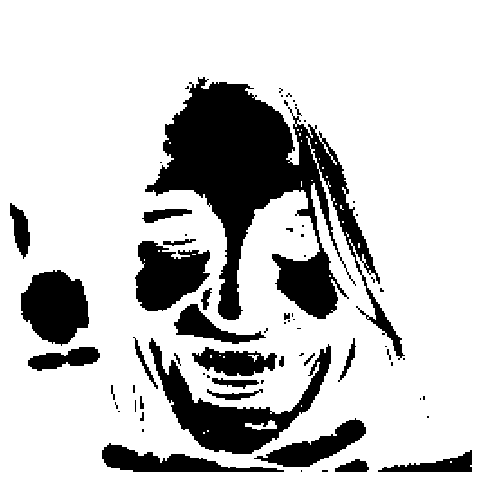

Displaying 00002.png


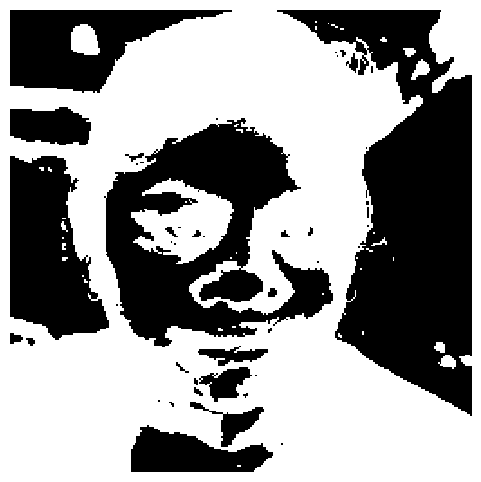

Displaying 00004.png


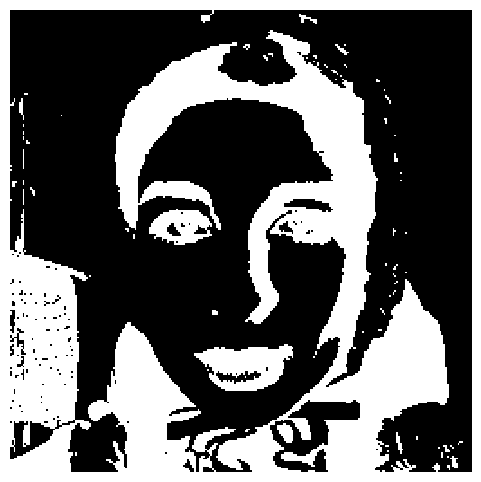

Displaying 00010.png


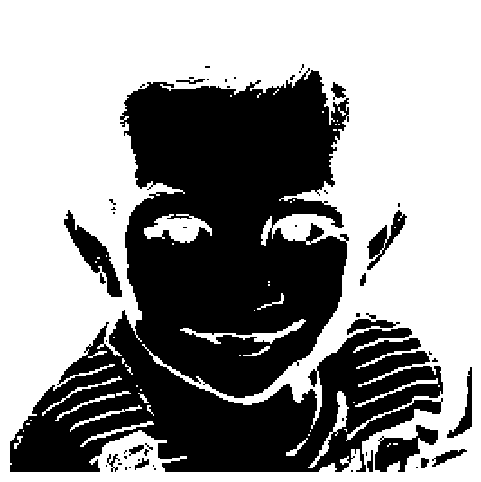

Displaying 00012.png


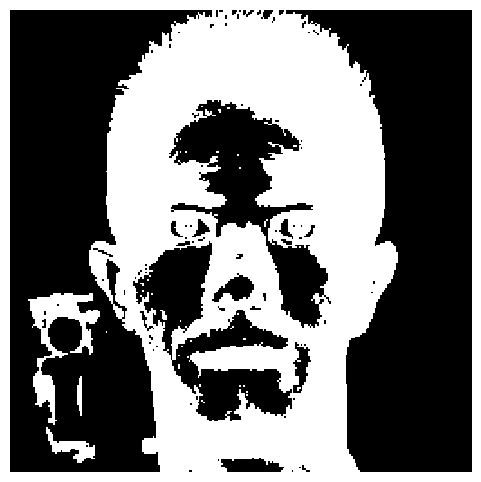

Displaying 00016.png


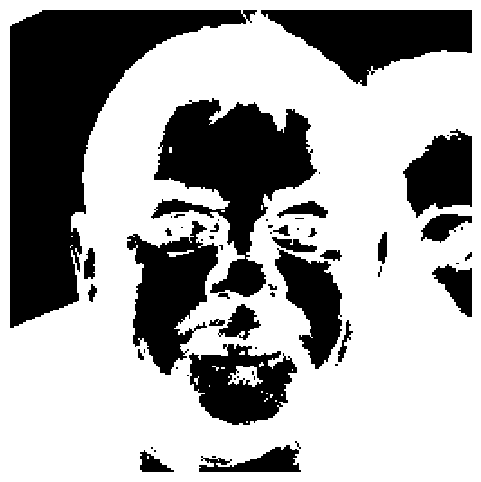

Displaying 00018.png


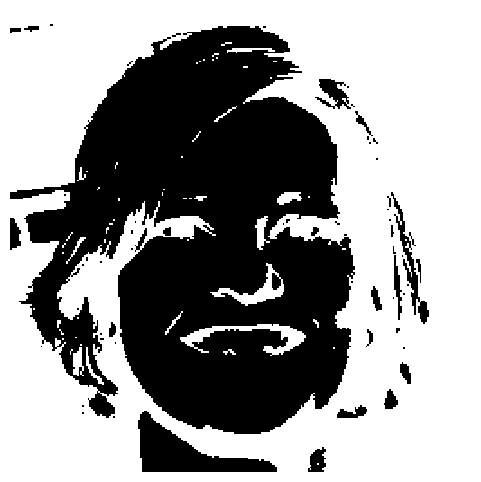

Displaying 00020.png


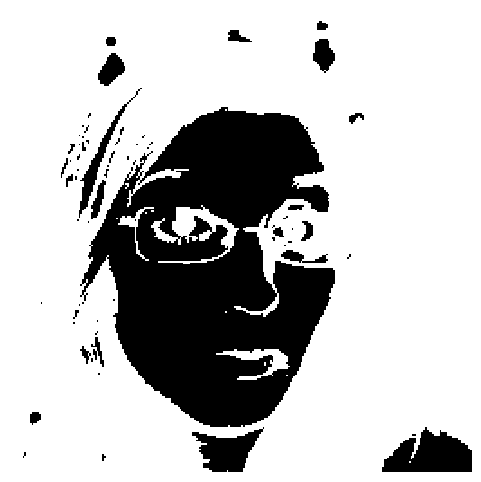

Displaying 00022.png


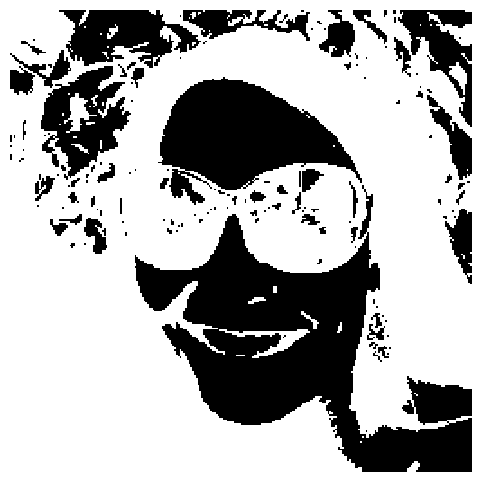

Displaying 00023.png


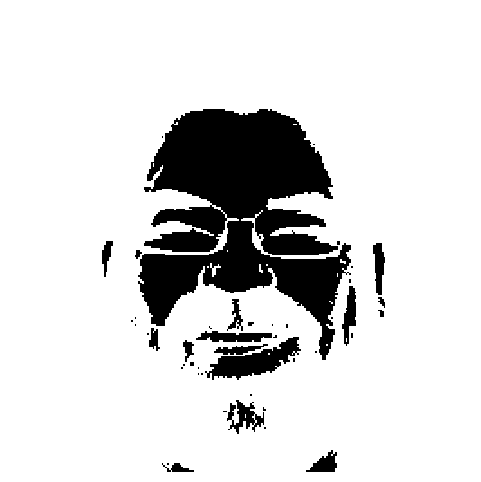

In [23]:
process_images('../data/images', '../data/grids', '../data/grids/csv_list.txt', size=(256, 256), threshold=0.5)
